# 10장 딥러닝 모델 설계하기

### 1. 모델의 정의

In [2]:
# 필요한 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
# 수술 환자 데이터
Data_set = np.loadtxt('data/ThoracicSurgery3.csv', delimiter=',')

# 환자 진찰 기록 X, 수술 1년 후 사망/생존 여부 y
X = Data_set[:, 0:16]
y = Data_set[:, 16]

### 2. 입력층,은닉층,출력층

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu')) # 노드, 입력층, 활성화 함수
model.add(Dense(1, activation='sigmoid')) # 출력층 - 출력값 하나

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3. 모델 컴파일

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4. 모델 실행하기

In [7]:
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.8560 - loss: 1.6773 
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7496 - loss: 0.5610
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8388 - loss: 0.4656
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8619 - loss: 0.4226
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8485 - loss: 0.4500


# 11장 데이터 다루기

### 1. 딥러닝과 데이터
- 빅데이터: 세월이 흐르면서 쌓인 방대한 데이터
- 좋은 데이터: 한쪽에 치우치지 않고, 불필요한 정보가 대량으로 포함 X, 왜곡되지 않은 데이터

### 2. 피마 인디언 데이터 분석하기
> 정보1: 과거 임신 횟수<br>
> 정보2: 포도당 부하 검사 2시간 후 공복 혈당 농도<br>
> 정보3: 확장기 혈압<br>
> 정보4: 삼두근 피부 주름 두께<br>
> 정보5: 혈청 인슐린<br>
> 정보6: 체질량 지수(BMI)<br>
> 정보7: 당뇨병 가족력<br>
> 정보8: 나이<br>
> 클래스: 당뇨(1), 당뇨 아님(0)

### 3. 판다스를 활용한 데이터 조사

In [8]:
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 피마 인디언 당뇨병 데이터셋 불러오기
df = pd.read_csv('data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# 정상과 당뇨 환자 각각 몇명인지 조사
df['diabetes'].value_counts() # 정상:500명, 당뇨병 환자:268명

diabetes
0    500
1    268
Name: count, dtype: int64

In [13]:
# 정보별 특징 - 샘플 수, 평균, 표준편차, 최솟값, 백분위 수, 최댓값
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# 각 항목의 상관관계
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


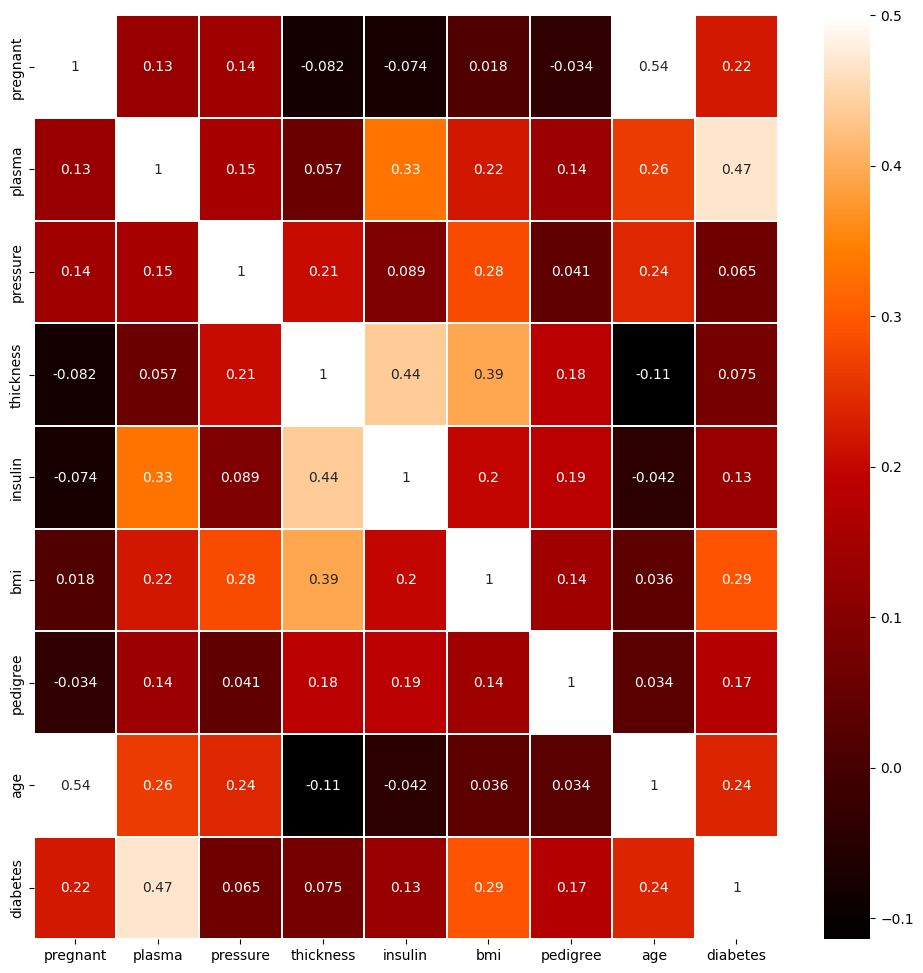

In [15]:
# 좀 더 한눈에 알아보기
colormap = plt.cm.gist_heat # 그래프의 색상 구성을 정함
plt.figure(figsize=(12,12)) # 그래프 크기

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show() # 숫자가 높을수록 밝은 색상

### 4. 중요한 데이터 추출하기
> plasma 항목(공복 혈당 농도)과 BMI(체질량 지수)가 diabetes 항목과 상관관계가 높다

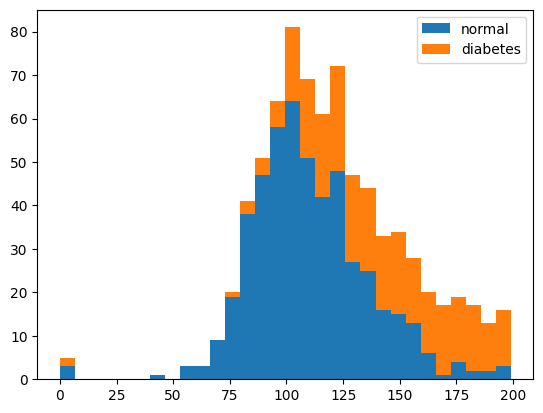

In [16]:
# plasma와 diabetes 분포 시각화
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend() # plasam 수치가 높아질수록 당뇨인 경우가 많음

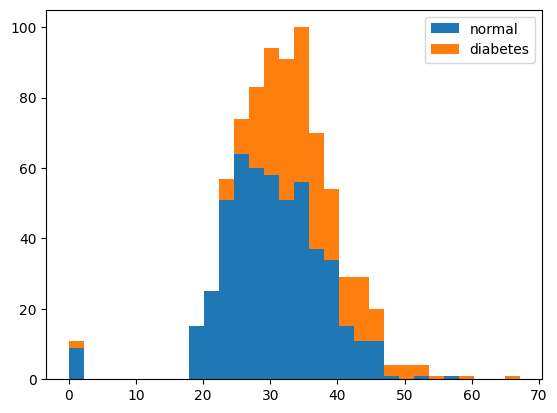

In [17]:
# BMI와 diabetes 분포 시각화
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend() # BMI가 높아질 경우 당뇨 방별률 증가

### 5. 피마 인디언의 당뇨병 예측 실행

In [18]:
# df.iloc[행_인덱스, 열_인덱스]
df = pd.read_csv('data/pima-indians-diabetes3.csv')

X = df.iloc[:, 0:8] # 세부 정보
y = df.iloc[:, 8] # 당뇨병 여부

In [19]:
# 모델 구조 결정
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

model.summary()

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.5908 - loss: 5.4050 
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.5858 - loss: 1.2113
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5796 - loss: 0.9909
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.5753 - loss: 0.8795
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.6042 - loss: 0.8410
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.6340 - loss: 0.7683
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.6175 - loss: 0.7547
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.6586 - loss: 0.6937
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6305 - loss: 0.6800
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.6814
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7045 - loss: 0.6404
Epoch 12/100
154/154 ━

# 12장 다중 분류 문제 해결하기

### 1. 다중 분류 문제
- 여러 개 답 중 하나를 고르는 분류 문제
> 정보1: 꽃받침 길이<br>
> 정보2: 꽃받침 너비<br>
> 정보3: 꽃잎 길이<br>
> 정보4: 꽃잎 너비<br>
> 클래스: iris-setosa, iris-versicolor, iris-viginica

### 2. 상관도 그래프

In [21]:
import pandas as pd

df = pd.read_csv('data/iris3.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


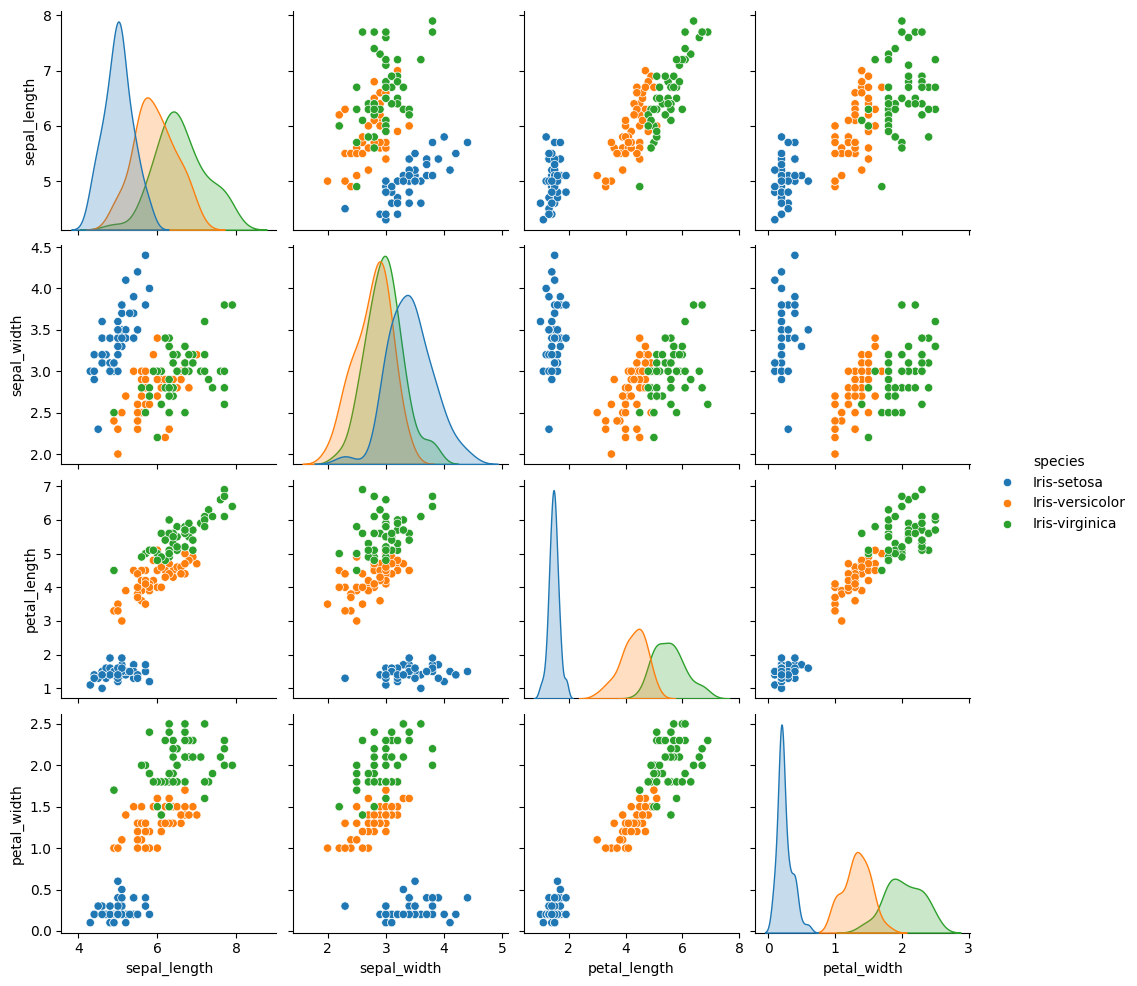

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

### 3. 원-핫 인코딩
- 딥러닝 계산을 위해 문자를 모두 숫자형으로 바꿔야 한다.
- 아이리스는 세 종류라서 각각의 이름으로 세 개 열을 만들고 자신의 이름이 일치하는 경우 1로 나머지는 0으로 바꾸어 준다.

| setosa | versicolor | virginica |
| ---- | --- | --- |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

In [23]:
# 데이터 프레임을 X, y로 나눈다
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

print(X[:5])
print(y[:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [24]:
# 원-핫 인코딩 처리
y = pd.get_dummies(y)

print(y[:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


### 4. 소프트맥스

In [25]:
# 모델 설정
model = Sequential()

model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs=50, batch_size=5)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.2980 - loss: 1.4417 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.2878 - loss: 1.1406   
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.4010 - loss: 0.9964
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.3399 - loss: 0.9998
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5001 - loss: 0.9388
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.6420 - loss: 0.9242
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.5922 - loss: 0.9017
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6789 - loss: 0.8739
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6551 - loss: 0.8593 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 0.8183
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.8061 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step

# 13장 모델 성능 검증하기

### 1. 데이터의 확인과 예측 실행

In [32]:
import pandas as pd

df = pd.read_csv('data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [33]:
# 마지막 컬럼 60번째 일반 암석 0, 광석 1
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [34]:
# 1 ~ 60번째 열 X 저장 광물의 종류 y로 저장
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

### 실습1 초음파 광물 예측하기: 데이터 확인과 실행

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# 모델 설정
model = Sequential()

model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5278 - loss: 0.7026
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6055 - loss: 0.6714 
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.6136 - loss: 0.6645
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6166 - loss: 0.6628 
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5877 - loss: 0.6531 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7189 - loss: 0.6206 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7481 - loss: 0.5765 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7356 - loss: 0.5638 
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7580 - loss: 0.5431 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.5299
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.5085 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

### 2. 과적합 이해하기
- 과적합(overfitting): 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만 새로운 데이터에 적용하면 잘 맞지 않는 것을 의미

### 3. 학습셋과 테스트셋
- 머신러닝 최종 목적은 과거의 데이터를 토대로 새로운 데이터 예측 - 과거의 데이터를 토대로 새로운 데이터 예측

In [35]:
# 저장된 X 데이터와 y 데이터에서 각각 정해진 비율 만큼 학습셋과 테스트셋 으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [36]:
# 모델 설정
model = Sequential()

model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.5597 - loss: 0.6839 
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5891 - loss: 0.6882 
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5408 - loss: 0.6875 
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.6554 - loss: 0.6640
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7137 - loss: 0.6510 
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6907 - loss: 0.6508 
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.6645 - loss: 0.6438
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7148 - loss: 0.6222 
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7536 - loss: 0.6090 
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.5811 
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7675 - loss: 0.5801
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [19]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8421 - loss: 0.4908  
Test accuracy:  0.841269850730896


### 4. 모델 저장과 재사용

In [20]:
# 모델 이름과 저장할 위치를 함께 지정
model.save('./model/my_model.hdf5')

In [21]:
# 모델 불러오기
from tensorflow.keras.models import Sequential, load_model

In [23]:
# 모델 메모리 삭제
del model

In [26]:
# 모델이저장된 위치와 이름까지 적기
model = load_model('./model/my_model.hdf5')

In [28]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.4908  
Test accuracy:  0.841269850730896


### K겹 교차 검증
- k겹 교차 검증(k-fold cross validation): 데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

In [43]:
# 광물 데이터 불러오기
df = pd.read_csv('data/sonar3.csv', header=None)

# 음파 관련 속성 X, 광물의 종류 y로 저장
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

In [44]:
# 몇 겹으로 나눌 것인지 정함
k = 5

# KFold 함수 불러오기 분할하기 전에 샘플이 치우치지 않도록 섞어 주기
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트 준비
acc_score = []

In [45]:
def model_fn():
  model = Sequential()
  model.add(Dense(24, input_dim=60, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
# k겹 교차 검증 이용해 k번의 학습 실행
for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index, :] , X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = model_fn()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

  accuracy = model.evaluate(X_test, y_test)[1]
  acc_score.append(accuracy)

In [47]:
# k번 시실된 정확도 평균
avg_acc_score = sum(acc_score) / k

# 결과 출력
print('정확도: ', acc_score)
print('정확도 평균: ', avg_acc_score)

정확도:  [0.9047619104385376, 0.9523809552192688, 0.6666666865348816, 0.8292682766914368, 0.9024389982223511]
정확도 평균:  0.8511033654212952


# 14장 모델 성능 향상시키기

### 1. 데이터의 확인과 검증셋

| 0 | 주석산 농도 |
| --- | --- |
| 1 | 아세트산 농도 |
| 2 | 구연산 농도 |
| 3 | 잔류 당분 농도 |
| 4 | 염화나트륨 농도 |
| 5 | 유리 아황산 농도 |
| 6 | 총 아황산 농도 |
| 7 | 밀도 |
| 8 | pH |
| 9 | 환상칼륨 농도 |
| 10 | 알코올 도수 |
| 11 | 와인의 맛(0 ~ 10등급) |
| 12 | 클래스(1: 레드 와인, 0: 화이트 와인)

In [48]:
import pandas as pd

df = pd.read_csv('data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [49]:
# 속성 12개 X로 열을 y로 정함
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [50]:
# 학습셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [51]:
def model_fn():
  model = Sequential()
  model.add(Dense(30, input_dim=12, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [52]:
# 모델 불러오기
model = model_fn()

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50


c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7537 - loss: 0.8497 - val_accuracy: 0.7831 - val_loss: 0.3721
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8315 - loss: 0.3702 - val_accuracy: 0.9046 - val_loss: 0.3599
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9005 - loss: 0.3357 - val_accuracy: 0.9108 - val_loss: 0.2619
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9020 - loss: 0.2808 - val_accuracy: 0.9223 - val_loss: 0.2403
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9194 - loss: 0.2591 - val_accuracy: 0.9392 - val_loss: 0.2284
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9312 - loss: 0.2441 - val_accuracy: 0.9400 - val_loss: 0.2095
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9339 - loss: 0.2293 - val_accuracy: 0.9362 - val_loss: 0.2020
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9312 - loss: 0.2243 - val_accuracy: 0.9362 - val_loss: 0.1936
Epoch 9/50
8/8 ━━━

In [53]:
# 테스 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score) # 손실 오차 , 정확도

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9425 - loss: 0.1536
Test accuracy:  [0.1586892455816269, 0.9399999976158142]


### 2. 모델 업데이트 하기

In [56]:
# 모델 정확도 저장
modelpath = './model/all/{epoch:02d}-{val_accuracy: .4f}.keras'

In [57]:
# 학습 중인 모델 저장
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [ ]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

In [59]:
# 테스 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score) # 손실 오차 , 정확도

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.9593 - loss: 0.1093
Test accuracy:  [0.11308988183736801, 0.9592307806015015]


### 3. 그래프로 과적합 확인하기

In [60]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9595 - loss: 0.1186 - val_accuracy: 0.9638 - val_loss: 0.0908
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9594 - loss: 0.1110 - val_accuracy: 0.9677 - val_loss: 0.0894
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9612 - loss: 0.1064 - val_accuracy: 0.9723 - val_loss: 0.0903
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9630 - loss: 0.1082 - val_accuracy: 0.9731 - val_loss: 0.0902
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1001 - val_accuracy: 0.9754 - val_loss: 0.0939
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9651 - loss: 0.0959 - val_accuracy: 0.9754 - val_loss: 0.0950
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9642 - loss: 0.1051 - val_accuracy: 0.9746 - val_loss: 0.0891
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9649 - loss: 0.1018 - val_accuracy: 0.9731 - val_loss

In [62]:
hist_df = pd.DataFrame(history.history)
hist_df.tail()

,accuracy,loss,val_accuracy,val_loss
1995,0.992815,0.032542,0.990000,0.060171
1996,0.992558,0.032489,0.990000,0.060404
1997,0.991019,0.032673,0.989231,0.059936
1998,0.991019,0.033155,0.990000,0.058491
1999,0.991789,0.031979,0.989231,0.058558


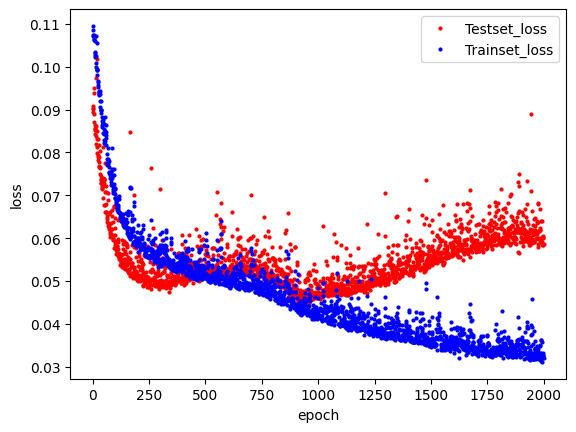

In [65]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 4. 학습의 자동 중단

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [68]:
modelpath = 'model/best/Ch14-4-bestmodel.keras'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [69]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9927 - loss: 0.0311 - val_accuracy: 0.9892 - val_loss: 0.0592
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9931 - loss: 0.0257 - val_accuracy: 0.9885 - val_loss: 0.0683
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0359 - val_accuracy: 0.9892 - val_loss: 0.0600
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9900 - val_loss: 0.0587
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9931 - loss: 0.0334 - val_accuracy: 0.9885 - val_loss: 0.0615
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0366 - val_accuracy: 0.9892 - val_loss: 0.0606
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9898 - loss: 0.0405 - val_accuracy: 0.9892 - val_loss: 0.0628
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9935 - loss: 0.0331 - val_accuracy: 0.9885 - val_loss

In [70]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9905 - loss: 0.0450
Test accuracy:  0.9884615540504456


# 15장 실제 데이터로 만들어 보는 모델

### 1. 데이터 파악하기

In [71]:
import pandas as pd

df = pd.read_csv('data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df.dtypes # 정수형, 실수형, 오브젝트형 등 여러 유형이 있음을 확인

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### 2. 결측치, 카테고리 변수 처리하기

In [73]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [74]:
# 카테고리형 변수 0, 1로 이루어진 변수로 변경
df = pd.get_dummies(df)

In [76]:
# 결측치 채우기
df = df.fillna(df.mean())

### 3. 속성별 관련도 추출하기

In [80]:
df_corr = df.corr() # 데이터 사이의 상관관계
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False) # 집 값과 관련이 큰 것부터 순서대로 정렬
df_corr_sort['SalePrice'].head(10) # 집 값과 관련도가 가장 큰 열 개 속성 출력

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

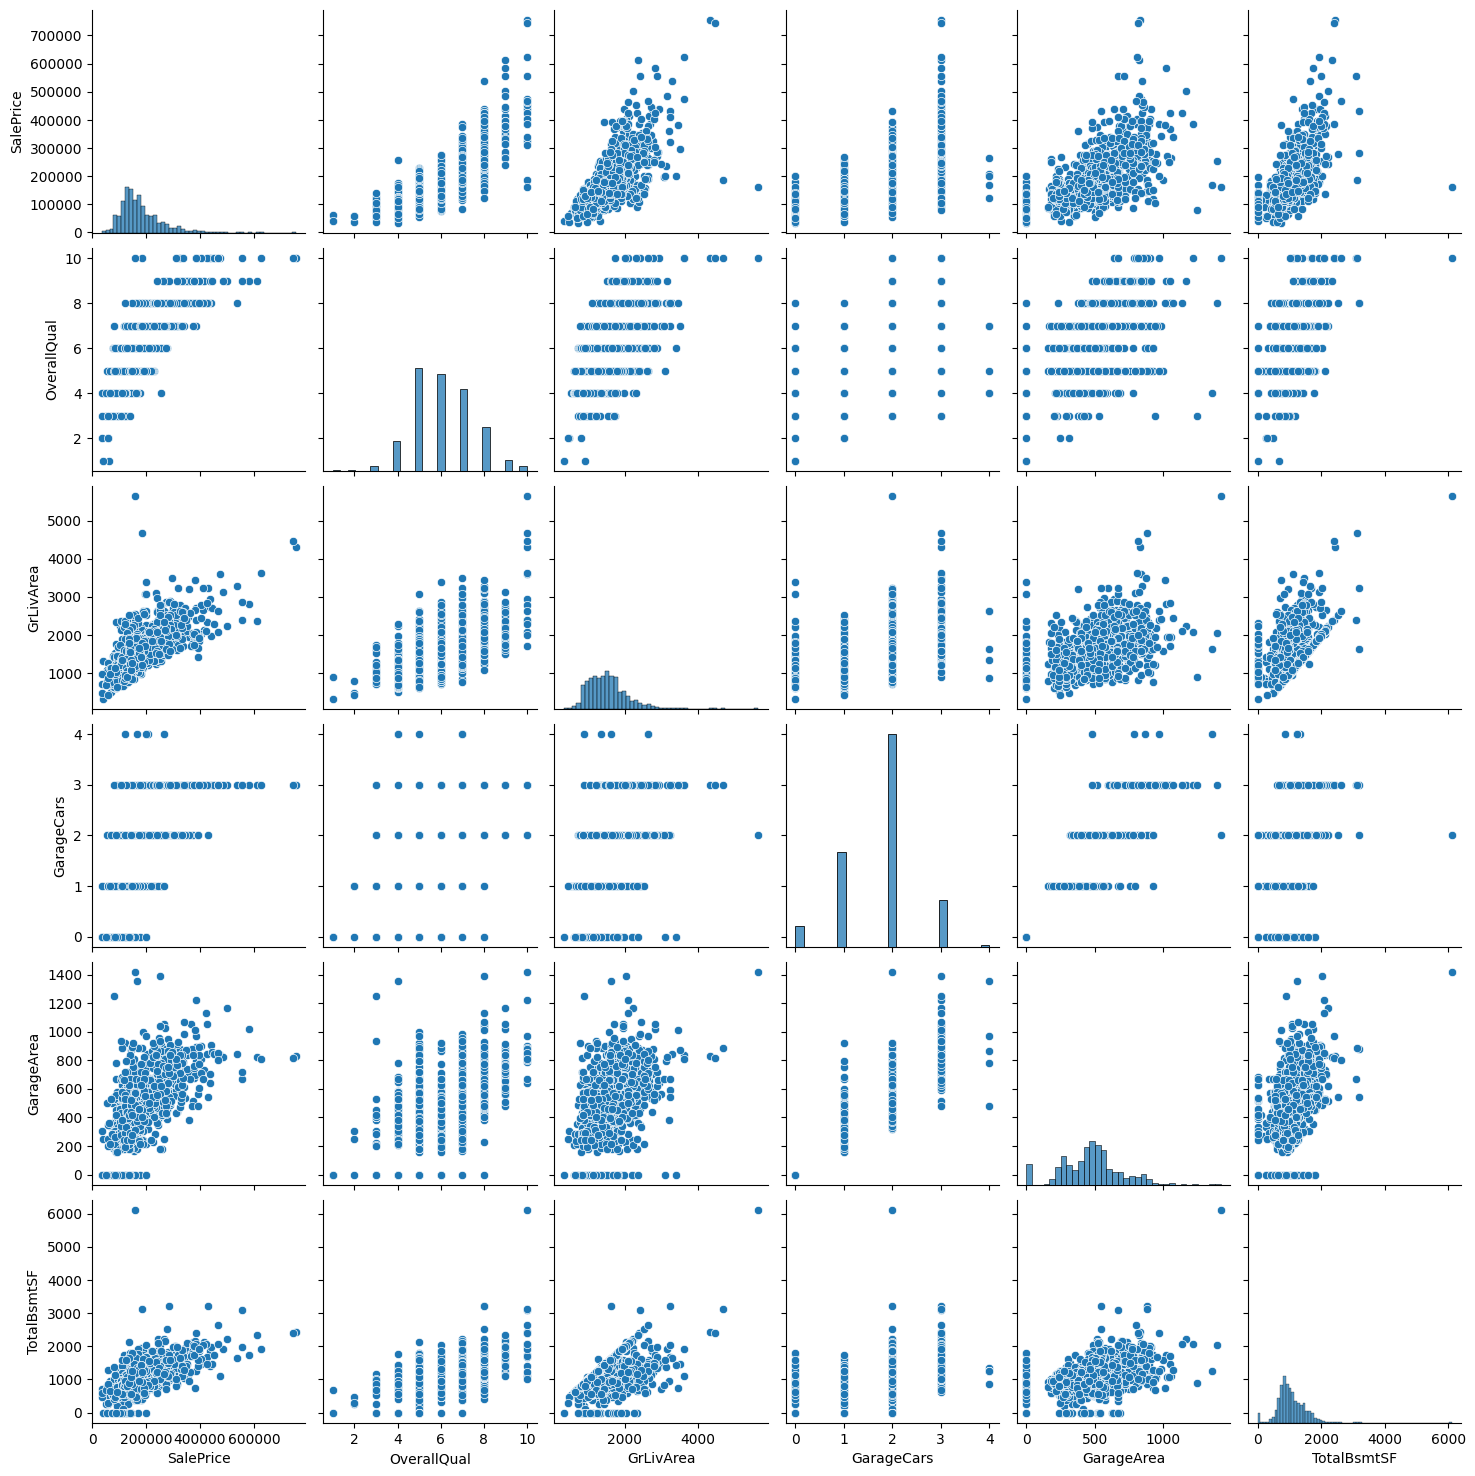

In [82]:
# 추출된 속성들과 집 값의 관련도를 시각화
import seaborn as sns

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

sns.pairplot(df[cols])
plt.show() # 양의 상관 관계

### 4. 주택 가격 예측 모델

In [83]:
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

X_train_pre = df[cols_train] # 속성 값
y = df['SalePrice'].values # 레이블 값

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [91]:
def model_fn():
  model = Sequential()
  model.add(Dense(10, input_dim=X_train_pre.shape[1], activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(1))

  return model

In [92]:
# 모델 생성
model = model_fn()

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './model/best/Ch15-house.keras'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37458014208.0000 - val_loss: 33587066880.0000
Epoch 2/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37613408256.0000 - val_loss: 32318179328.0000
Epoch 3/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38726881280.0000 - val_loss: 29742149632.0000
Epoch 4/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31922980864.0000 - val_loss: 24924497920.0000
Epoch 5/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28034795520.0000 - val_loss: 17179140096.0000
Epoch 6/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17640214528.0000 - val_loss: 8167556096.0000
Epoch 7/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7724624896.0000 - val_loss: 2559149312.0000
Epoch 8/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2879129344.0000 - val_loss: 1455720320.0000
Epoch 9/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3090564096.0000 - val_loss: 1444635136.0000
Epoch 10/2000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [94]:
# 학습 결과 확인
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제가격 : {:.2f}, 예상가격 : {:.2f}'.format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter += 1
  X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
실제가격 : 370878.00, 예상가격 : 224869.20
실제가격 : 284000.00, 예상가격 : 240008.50
실제가격 : 145000.00, 예상가격 : 123767.07
실제가격 : 114504.00, 예상가격 : 132843.38
실제가격 : 252000.00, 예상가격 : 234923.33
실제가격 : 231500.00, 예상가격 : 195112.33
실제가격 : 184100.00, 예상가격 : 149861.58
실제가격 : 129000.00, 예상가격 : 163160.75
실제가격 : 128950.00, 예상가격 : 106878.15
실제가격 : 309000.00, 예상가격 : 269907.94
실제가격 : 210000.00, 예상가격 : 186912.02
실제가격 : 256300.00, 예상가격 : 237659.27
실제가격 : 287000.00, 예상가격 : 263126.06
실제가격 : 143000.00, 예상가격 : 119337.55
실제가격 : 194700.00, 예상가격 : 183866.11
실제가격 : 235000.00, 예상가격 : 216501.09
실제가격 : 262280.00, 예상가격 : 253028.89
실제가격 : 256000.00, 예상가격 : 282831.44
실제가격 : 220000.00, 예상가격 : 230366.36
실제가격 : 80000.00, 예상가격 : 97154.67
실제가격 : 155900.00, 예상가격 : 128547.24
실제가격 : 105900.00, 예상가격 : 101117.51
실제가격 : 103200.00, 예상가격 : 83755.41
실제가격 : 172400.00, 예상가격 : 188680.97
실제가격 : 141000.00, 예상가격 : 128547.24


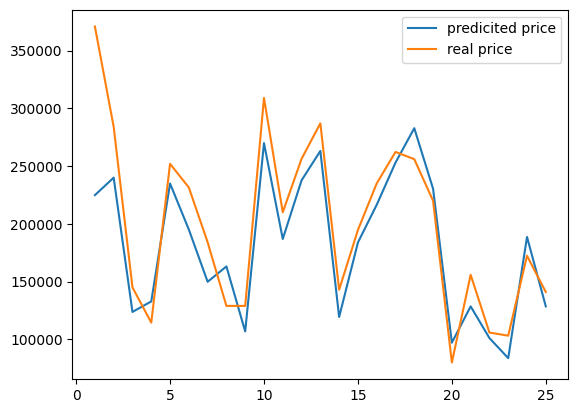

In [95]:
# 시각화
plt.plot(X_num, pred_prices, label='predicited price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()